# Lab 2


## The Ludolphine project

You will also write your first program. The goal is to determine the Ludolphione number $\pi$. There are many ways it can be done. We want to implement two simple methods that are easy to do with a computer but hard and tedious without.

In [1]:
#setup environment
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


## Part 1: Numerically integrating the area of a circle

1. Sketch out the algorithm you want to use. This involves some kind of flow-diagram and writing out the program in pseudo-programing language.
2. Implement algorithm; while you write it add reasonable comments, short and relevant.
3. Run algorithm and generate results.
4. Test the program carefully. What can you do to convince yourself that your algorithm is working correctly?

### 1. sketch 
* calculate only a quarter
* circumference is at $y = \sqrt{r^2 - x^2}$, and $r=1$

In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [4]:
y = lambda x: sqrt(1 - x**2)
n=10000
x=linspace(0,1,n)
x10=linspace(0,1,10*n)

<IPython.core.display.Javascript object>


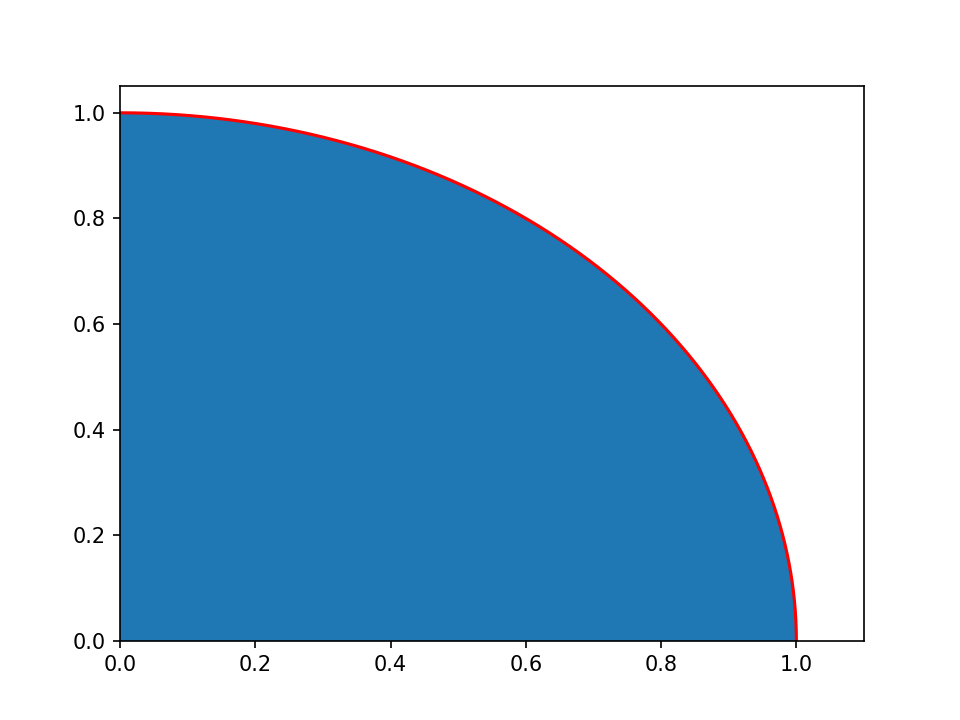

(0, 1.1)

In [5]:
bar(x,y(x),1./(n-1))
plot(x10,y(x10),'r-')
xlim(0,1.1)

* divide interval [0,1] into n sections
* calculate y(x) at each left boundary
* calculate rectangle
* add all rectangles

### 2. Algorithm

In [6]:
def riemann(start, stop, n):
    x = linspace(start, stop, n+1)
    f = lambda x: np.sqrt(1 - x**2)
    A = 0.0
    for i in range(n+1):
       A = A + (f(x[i])*(1/n))
   
    pi = 4*A
    return pi

### 3. Testing

In [7]:
riemann(-1,1,n)

3.1415893274305819

In [8]:
riemann(-1,1,10000000)

3.1415926534847225


## Part 2: Monte Carlo method

* how could one determine $\pi$ using Monte Carlo?

### Sketch
* generate random points in a square
* decide if point is in circle with the same diameter as the side of the square
* the ratio of the area of the circle to the area of the square is proportional to the ratio of the points in the circle to the points in the square


In [10]:
import random as r

### Algorithm

In [11]:
def MonteCarlo(points, total):
    xvals = []
    yvals = []
    for i in range(total):
        x = r.random()**2
        y = r.random()**2
        if np.sqrt(x+y) <= 1:
            points = points + 1
    pi = (points/total)*4
    return pi

### Testing

In [17]:
MonteCarlo(0, 1000)
MonteCarlo(0, 10000)
MonteCarlo(0, 100000)
MonteCarlo(0, 1000000)
MonteCarlo(0, 10000000)

3.1411528

## Part 3: Convergence
In both cases the accuracy of the result will depend on the number of rectangles used, or the number of MC points. It can be expected that for higher resolution the accuracy should be higher. In this lab you should show how the accuracy depends on the numerical resolution in both cases. Discuss your results and evaluate the convergence behaviour of both methods.

In [25]:
Numerical = []
Monte = []

values = [1000, 10000, 100000, 1000000, 10000000]

for i in range(len(values)):
    Numerical.append(riemann(-1,1,values[i]))
    Monte.append(MonteCarlo(0,values[i]))

print("Riemann sum method: ", Numerical)
print("\nMonte Carlo method: ", Monte)
print("\nBoth converge to pi, but the numerical version is better. Both get more accurate with larger values.")

Riemann sum method:  [3.1414874770021419, 3.1415893274305819, 3.1415925484068445, 3.1415926502634548, 3.1415926534847225]

Monte Carlo method:  [3.12, 3.156, 3.13784, 3.13916, 3.141372]

Both converge to pi, but the numerical version is better. Both get more accurate with larger values.
